In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
print("✅ Libraries Imported Successfully!")


✅ Libraries Imported Successfully!


🎯 Target Column Identified: is_fraud

📌 Dataset Shape: (555719, 23)

📌 Missing Values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


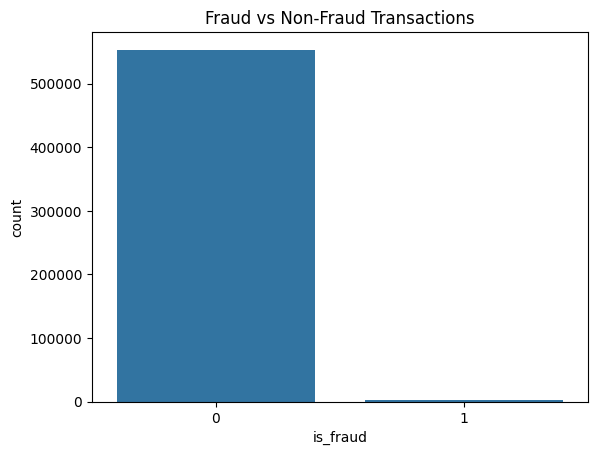

In [9]:
# Function to load and preprocess dataset
def load_and_preprocess_dataset(file_path):
    df = pd.read_csv(file_path)
    
    # Identify the target column (last column)
    target_column = df.columns[-1]
    print(f"🎯 Target Column Identified: {target_column}\n")
    
    # Display basic dataset details
    print("📌 Dataset Shape:", df.shape)
    print("\n📌 Missing Values:\n", df.isnull().sum())
    
    # Plot class distribution
    sns.countplot(x=target_column, data=df)
    plt.title('Fraud vs Non-Fraud Transactions')
    plt.show()
    
    return df, target_column

# Load dataset (Change the path to your dataset)
file_path = 'archive/fraudTest.csv'  # Replace with actual path
df, target_column = load_and_preprocess_dataset(file_path)


In [10]:
def preprocess_data(df, target_column):
    # Encode categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = encoder.fit_transform(df[col])
    
    # Splitting features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Splitting data into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling numerical features
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
    
    return X_train, X_test, y_train, y_test

# Preprocess dataset
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)
print("✅ Data Preprocessing Completed!")


✅ Data Preprocessing Completed!



🚀 Logistic Regression Model Performance:
✅ Accuracy: 0.9958342330670121
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



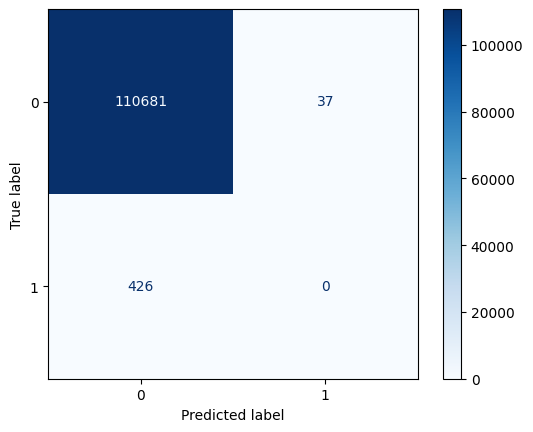


🚀 Decision Tree Model Performance:
✅ Accuracy: 0.9974177643417549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.75      0.49      0.59       426

    accuracy                           1.00    111144
   macro avg       0.87      0.74      0.80    111144
weighted avg       1.00      1.00      1.00    111144



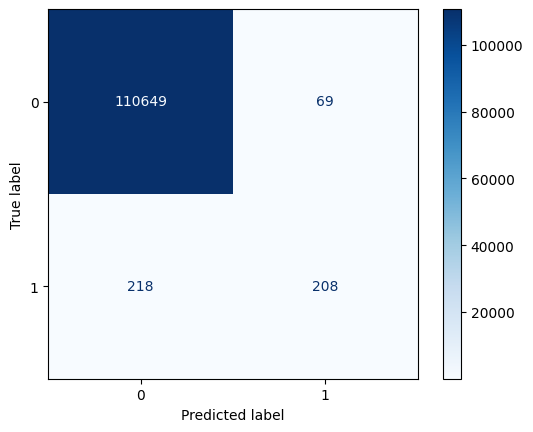


🚀 Random Forest Model Performance:
✅ Accuracy: 0.9961851292017563
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       1.00      0.00      0.01       426

    accuracy                           1.00    111144
   macro avg       1.00      0.50      0.50    111144
weighted avg       1.00      1.00      0.99    111144



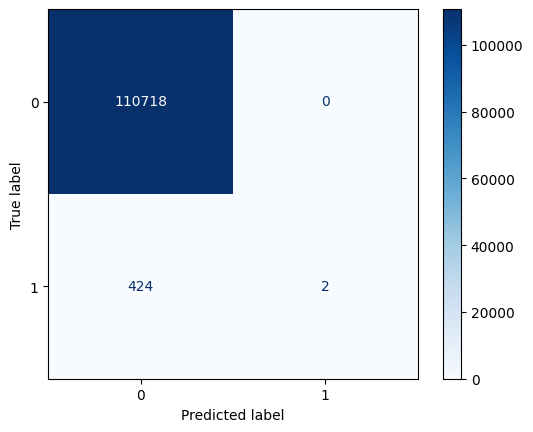


🚀 XGBoost Model Performance:
✅ Accuracy: 0.9992622183833585
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.96      0.85      0.90       426

    accuracy                           1.00    111144
   macro avg       0.98      0.92      0.95    111144
weighted avg       1.00      1.00      1.00    111144



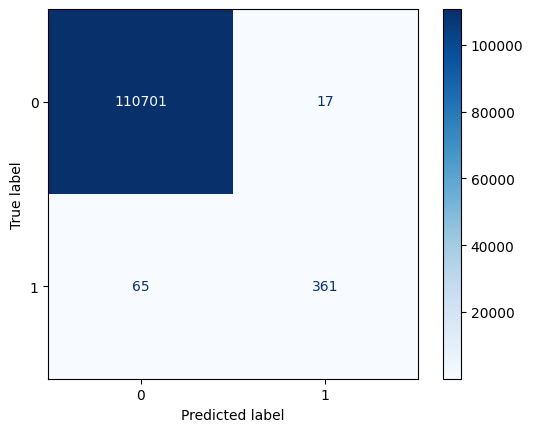

In [11]:
def evaluate_model(model_name, model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)
    
    print(f"\n🚀 {model_name} Model Performance:")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
    plt.show()

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)


In [12]:
print("\n📌 Model Comparison Complete!")



📌 Model Comparison Complete!



🚨 Total Fraudulent Transactions Found: 2145
📌 Displaying First 10 Fraudulent Transactions:

      Unnamed: 0  trans_date_trans_time            cc_num  merchant  category  \
1685        1685                   1648  3560725013359375       226         5   
1767        1767                   1727  6564459919350820       523         8   
1781        1781                   1741  6564459919350820       451         0   
1784        1784                   1744  4005676619255478       238        11   
1857        1857                   1813  3560725013359375       246        12   
1891        1891                   1846  3524574586339330       620         5   
1906        1906                   1859  4005676619255478       346        11   
1956        1956                   1908  4005676619255478       503        11   
1968        1968                   1920  4005676619255478       311        11   
2026        2026                   1978  6564459919350820       386        11   

          amt  

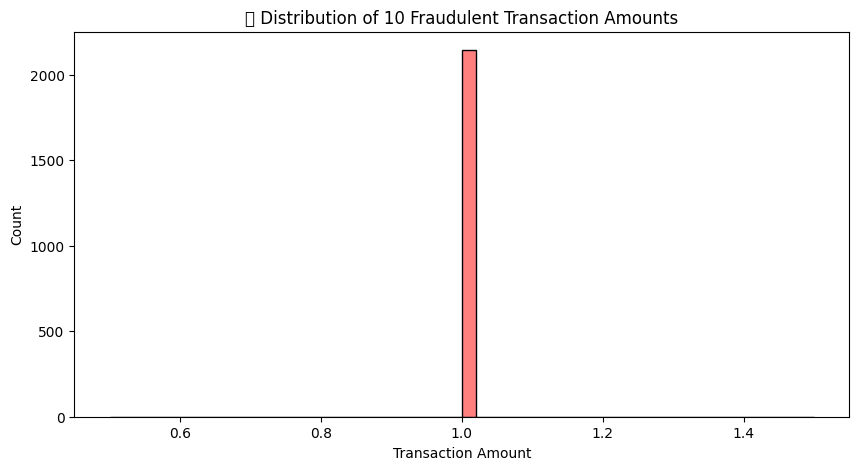

In [13]:
# 📌 Retrieve and Display Fraudulent Transactions Based on User Input
def display_fraudulent_data(df, target_column, num_records=20):
    # Filter only fraudulent transactions (where target column = 1)
    fraudulent_data = df[df[target_column] == 1]
    
    total_frauds = len(fraudulent_data)
    print(f"\n🚨 Total Fraudulent Transactions Found: {total_frauds}")
    
    # Ensure the requested number is not greater than available records
    num_records = min(num_records, total_frauds)
    print(f"📌 Displaying First {num_records} Fraudulent Transactions:\n")
    
    # Display user-defined number of fraudulent transactions
    print(fraudulent_data.head(num_records))
    
    # Plot Fraudulent Transaction Amounts
    plt.figure(figsize=(10, 5))
    sns.histplot(fraudulent_data[target_column], bins=50, kde=True, color='red')
    plt.title(f"📊 Distribution of {num_records} Fraudulent Transaction Amounts")
    plt.xlabel("Transaction Amount")
    plt.ylabel("Count")
    plt.show()
    
    return fraudulent_data.head(num_records)

# ✅ Ask the user how many fraud transactions they want to see
num_records_to_display = int(input("\n🔹 Enter the number of fraudulent transactions to display: "))
fraudulent_transactions = display_fraudulent_data(df, target_column, num_records_to_display)
